In [246]:
import pandas as pd
import numpy
import pickle
import matplotlib.pyplot as plt
import time
import os
from random import choice
import random
from string import ascii_lowercase


In [247]:
number_of_tests=3
list_of_row_size=[1400,14000,60000,120000,1200000,6000000]
colors1=["White","Yellow","Blue","Red","Green","Black","Brown","Azure","Ivory","Teal","Silver","Purple","Navy blue","Pea green","Gray","Orange","Maroon","Charcoal","Aquamarine","Coral","Fuchsia","Wheat","Lime","Crimson","Khaki","Hot pink","Magenta","Olden","Plum","Olive","Cyan"]


# Creating a Random Files of Different files and calculating the avg time taken for each file to write to disk.

In [248]:
serial_reslts={}
scaling_start=time.time()
i=0
for row_count in list_of_row_size:
    test_reslts=[]
    for test_indx in range(number_of_tests): 
        #generating a 2 dimentional array with random character of length between 3 and 25
        z=[[random.choice(colors) for col in range(0,10)] for row in range(0,row_count)]
        # creating a dataframe with 10 columns and given no of rows
        df = pandas.DataFrame(z,columns=list('ABCDEFGHIJ'))
        # wrap the line of the code we are measuring with timing 
        start_time = time.time()
     
        # creating a file
        df.to_csv("x" + str(i) + ".csv")
        i=i+1
        test_reslts.append(time.time() - start_time) # store elapsed time to a list
    # after running the experiment multiple times, record the average result to a dictionary
    serial_reslts[row_count]=sum(test_reslts)/number_of_tests
    
    # progress indicator as we scale up
    print('elapsed time:',round(time.time() - scaling_start,2),'for',row_count)

elapsed time: 2.03 for 1400
elapsed time: 2.43 for 14000
elapsed time: 4.1 for 60000
elapsed time: 7.32 for 120000
elapsed time: 41.19 for 1200000
elapsed time: 209.69 for 6000000


# Finding the size of each file

In [317]:
i=0
size=[]
for i in range(18):
    statinfo = os.path.getsize("x" + str(i) + ".csv")
    if(i%3==0):
        size.append(statinfo/1024/1024)
    print(statinfo/1024/1024)

0.09630012512207031
0.09645557403564453
0.09628868103027344
0.9784631729125977
0.9789257049560547
0.9791803359985352
4.23045539855957
4.228681564331055
4.230749130249023
8.489181518554688
8.48828411102295
8.488972663879395
86.0294418334961
86.03571510314941
86.03548049926758
434.3610677719116
434.35089111328125
434.37980937957764


# Displaying Avg Time Taken to Write file into disk

In [250]:
serial_reslts

{1400: 0.006670633951822917,
 14000: 0.03789933522542318,
 60000: 0.15626088778177896,
 120000: 0.2999107042948405,
 1200000: 3.1073641777038574,
 6000000: 15.795418421427408}

In [251]:
serial_reslts1={}
serial_reslts1=serial_reslts

# Calculating the time to load the data from Disk

In [252]:
read_reslts={}
scaling_start=time.time()
i=0
for row_count in list_of_row_size:
    test_reslts=[]
    for test_indx in range(number_of_tests): 
        # wrap the line of the code we are measuring with timing 
        start_time = time.time()
        data={}
     
        # creating a file
        data = pd.read_csv("x" + str(i) + ".csv")
        i=i+1
        test_reslts.append(time.time() - start_time) # store elapsed time to a list
        
        

    # after running the experiment multiple times, record the average result to a dictionary
    read_reslts[row_count]=sum(test_reslts)/number_of_tests
    
    # progress indicator as we scale up
    print('elapsed time:',round(time.time() - scaling_start,2),'for',row_count)

elapsed time: 0.03 for 1400
elapsed time: 0.11 for 14000
elapsed time: 0.36 for 60000
elapsed time: 0.77 for 120000
elapsed time: 4.5 for 1200000
elapsed time: 22.76 for 6000000


# Displaying Avg Time Taken to Load file from disk

In [288]:
read_reslts

{1400: 0.010959466298421225,
 14000: 0.024268547693888348,
 60000: 0.08410875002543132,
 120000: 0.13697965939839682,
 1200000: 1.243674596150716,
 6000000: 6.084401448567708}

In [254]:
read_reslts1={}
read_reslts1=read_reslts

In [267]:
j=0
for i in range(len(list_of_row_size)):
    x=[[serial_reslts[list_of_row_size[j]]] for row in range(0,6)]
    print([list_of_row_size[j]])
    j=j+1
    '1400','14000','60000','120000','1200000','6000000'

[1400]
[14000]
[60000]
[120000]
[1200000]
[6000000]


In [297]:
values={}
values = pandas.DataFrame(index=[1400,14000,60000,120000,1200000,6000000], columns=['Read time','Write time'])

https://stackoverflow.com/questions/13842088/set-value-for-particular-cell-in-pandas-dataframe-using-index

In [304]:
for i in range(len(list_of_row_size)):
    values.set_value(list_of_row_size[i], 'Read time', read_reslts[list_of_row_size[i]])
    values.set_value(list_of_row_size[i], 'Write time', serial_reslts[list_of_row_size[i]])

C:\Users\ravit\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
C:\Users\ravit\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  This is separate from the ipykernel package so we can avoid doing imports until


# Table of values (file size versus read time and write time for each experiment) 

In [305]:
values

,Read time,Write time
1400,0.0109595,0.00667063
14000,0.0242685,0.0378993
60000,0.0841088,0.156261
120000,0.13698,0.299911
1200000,1.24367,3.10736
6000000,6.0844,15.7954


In [306]:
read=[]
for i in range(len(list_of_row_size)):
    read.append(read_reslts[list_of_row_size[i]])

In [307]:
load=[]
for i in range(len(list_of_row_size)):
    load.append(serial_reslts[list_of_row_size[i]])

# Plot the average write times and average load times versus file size in a single scatter plot with semilogx scale

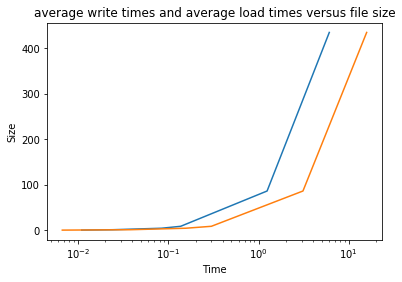

In [335]:
import matplotlib.pyplot as plt
plt.semilogx(read,size)
plt.semilogx(load,size )
plt.ylabel("Size")
plt.xlabel("Time")
plt.title("average write times and average load times versus file size")
plt.show()

In [319]:
size

[0.09630012512207031,
 0.9784631729125977,
 4.23045539855957,
 8.489181518554688,
 86.0294418334961,
 434.3610677719116]

Text(0.5, 1.0, 'average write times and average load times versus file size')

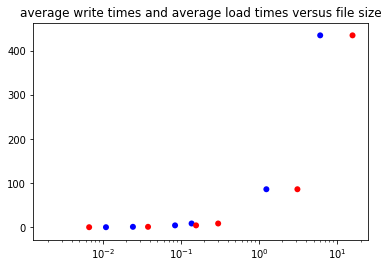

In [337]:
fig = plt.figure()
ax = plt.gca()
ax.scatter(read ,size , c='blue', edgecolors='none')
ax.scatter(load ,size , c='Red', edgecolors='none')
ax.set_xscale('log')
ax.set_title("average write times and average load times versus file size")
